In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from statsmodels.graphics.gofplots import qqplot

In [100]:
#Merge ther 12 months of Sales data into Single CSV file

files = [file for file in os.listdir('..//SALES_2019_REPORT//data')]
all_data = pd.DataFrame()
for file in files:
    data = pd.read_csv('..//SALES_2019_REPORT//data/' + file)
    all_data = pd.concat([all_data, data])
all_data.to_csv('all_data', index = False)


In [101]:
#Data preprosessing
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [102]:
categorical = all_data.select_dtypes(['category','object']).columns

for col in categorical:
    print('{} : {} unique value(s)'.format(col, all_data[col].nunique()))


Order ID : 178438 unique value(s)
Product : 20 unique value(s)
Quantity Ordered : 10 unique value(s)
Price Each : 18 unique value(s)
Order Date : 140323 unique value(s)
Purchase Address : 140788 unique value(s)


In [103]:
missing_val = all_data.isnull().sum()

In [104]:
total_cell = np.product(all_data.shape)
total_missing = missing_val.sum()
percentage_missing = (total_missing/total_cell)*100
print(f"{percentage_missing:.2f}%")

0.29%


In [105]:
#Drop NaN data
all_data = all_data.dropna(how='all')
all_data[all_data.isna().any(axis=1)]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,19-04-19,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,07-04-19,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,12-04-19,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,12-04-19,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,30-04-19,"333 8th St, Los Angeles, CA 90001"


In [106]:
all_data = all_data[all_data['Quantity Ordered'].astype('string').str.contains("Quantity Ordered")==False]
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int64')
all_data['Price Each'] = all_data['Price Each'].astype('float')


In [108]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


In [109]:
categorical = all_data.select_dtypes(['category','object']).columns

for col in categorical:
    print('{} : {} unique value(s)'.format(col, all_data[col].nunique()))

Order ID : 178437 unique value(s)
Product : 19 unique value(s)
Purchase Address : 140787 unique value(s)


In [110]:
def augment_data(data):
    def get_city(address):
        return address.split(',')[1]

    def get_state(address):
        return address.split(',')[2].split(' ')[1]
    
    data['Year'] = data['Order Date'].dt.year
    data['Month'] = data['Order Date'].dt.month
    data['Hour'] = data['Order Date'].dt.hour
    data['Minute'] = data['Order Date'].dt.minute
    data['Sale'] = data['Quantity Ordered'] * data['Price Each']
    data['Cities'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)} {get_state(x)}")
    return data
    
all_data = augment_data(all_data)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Sale,Cities
0,176558,USB-C Charging Cable,2,11.95,2019-04-19,"917 1st St, Dallas, TX 75001",2019,4,0,0,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-07-04,"682 Chestnut St, Boston, MA 02215",2019,7,0,0,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-12-04,"669 Spruce St, Los Angeles, CA 90001",2019,12,0,0,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-12-04,"669 Spruce St, Los Angeles, CA 90001",2019,12,0,0,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30,"333 8th St, Los Angeles, CA 90001",2019,4,0,0,11.99,Los Angeles CA


In [111]:
#Data Analysis

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'Quantity Ordered'),
  Text(0, 1.5, 'Price Each'),
  Text(0, 2.5, 'Year'),
  Text(0, 3.5, 'Month'),
  Text(0, 4.5, 'Hour'),
  Text(0, 5.5, 'Minute'),
  Text(0, 6.5, 'Sale')])

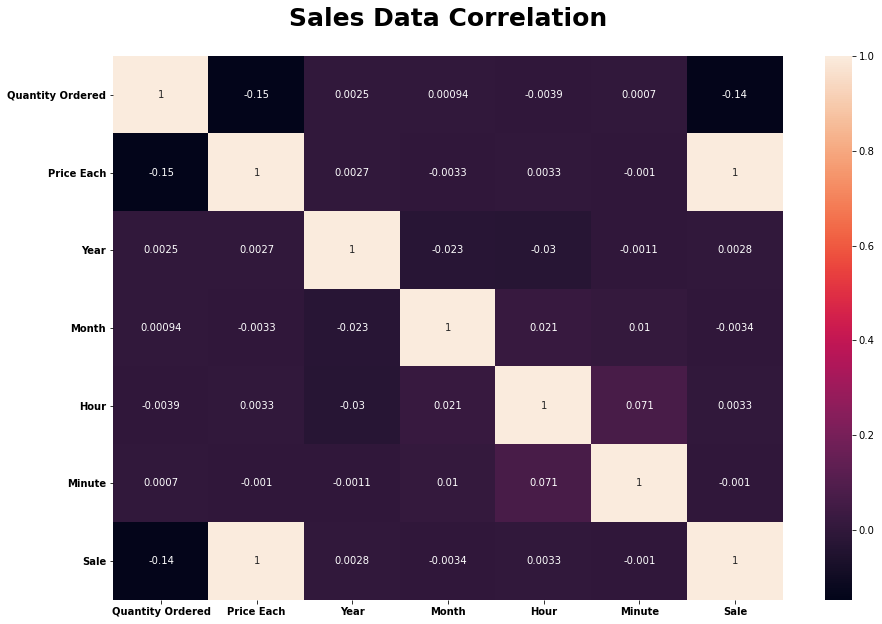

In [112]:
plt.figure(figsize = (15,10))
sns.heatmap(all_data.corr(), annot = True)
plt.title('Sales Data Correlation', weight = 'bold', fontsize = 25, pad = 30)
plt.xticks(weight = 'bold', fontsize = 10)
plt.yticks(weight = 'bold', fontsize = 10)

In [113]:
all_data.corr()['Sale'].sort_values(ascending=False).to_frame().T

,Sale,Price Each,Hour,Year,Minute,Month,Quantity Ordered
Sale,1.0,0.999203,0.003265,0.002824,-0.001034,-0.003422,-0.139417


In [114]:
all_data_numeric = all_data.describe(include =[np.number])
all_data_numeric

,Quantity Ordered,Price Each,Year,Month,Hour,Minute,Sale
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399735,2019.000183,7.070922,14.117026,28.870266,185.490917
std,0.442793,332.731330,0.013521,3.500310,5.746586,17.635258,332.919771
min,1.000000,2.990000,2019.000000,1.000000,0.000000,0.000000,2.990000
25%,1.000000,11.950000,2019.000000,4.000000,11.000000,14.000000,11.950000
50%,1.000000,14.950000,2019.000000,7.000000,15.000000,29.000000,14.950000
75%,1.000000,150.000000,2019.000000,10.000000,19.000000,44.000000,150.000000
max,9.000000,1700.000000,2020.000000,12.000000,23.000000,59.000000,3400.000000


In [115]:
all_data_object = all_data.describe(exclude=[np.number])
all_data_object

<ipython-input-115-50cc7a110984>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  all_data_object = all_data.describe(exclude=[np.number])


,Order ID,Product,Order Date,Purchase Address,Cities
count,185950,185950,185950,185950,185950
unique,178437,19,140257,140787,10
top,160873,USB-C Charging Cable,2019-03-30 00:00:00,"193 Forest St, San Francisco, CA 94016",San Francisco CA
freq,5,21903,43,9,44732
first,NaN,NaN,2019-01-01 00:00:00,NaN,NaN
last,NaN,NaN,2020-01-01 05:13:00,NaN,NaN


In [116]:
def univariate_analysis(data, color, title1, title2):
    fig, (ax1,ax2) = plt.subplots(ncols = 2, nrows = 1, figsize = (20,6))

    sns.distplot(data, ax=ax1, kde = True, color = color)
    
    ax1.set_title(title1, weight ='bold', fontsize = 25, pad=30)

    qqplot(data, ax=ax2, line='s')
    
    ax2.set_title(title2, weight='bold', fontsize = 25, pad = 30)

    return fig

C:\Users\nguye\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


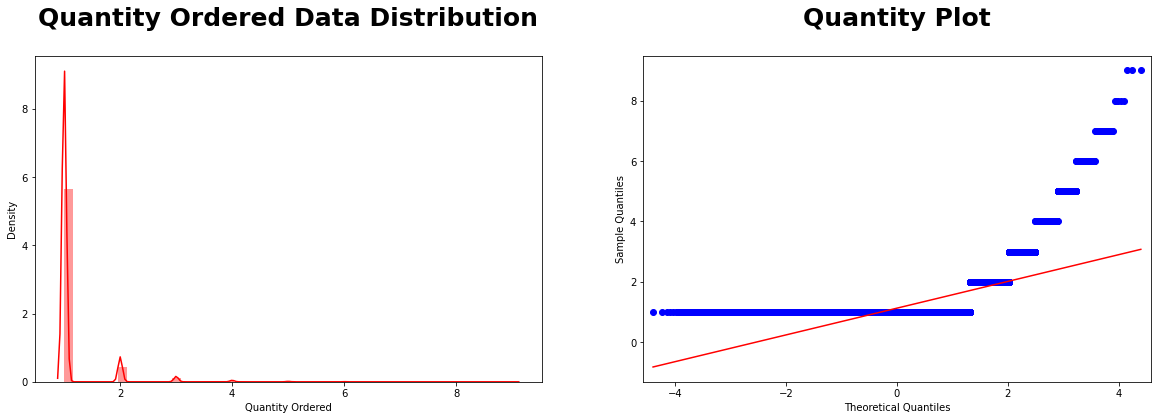

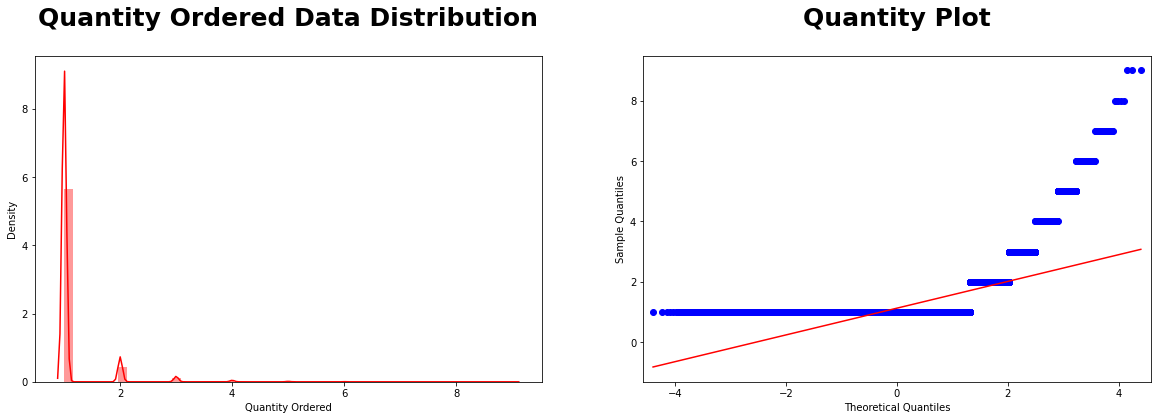

In [117]:
univariate_analysis(data=all_data['Quantity Ordered'],color='red',title1='Quantity Ordered Data Distribution',title2='Quantity Plot')

C:\Users\nguye\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


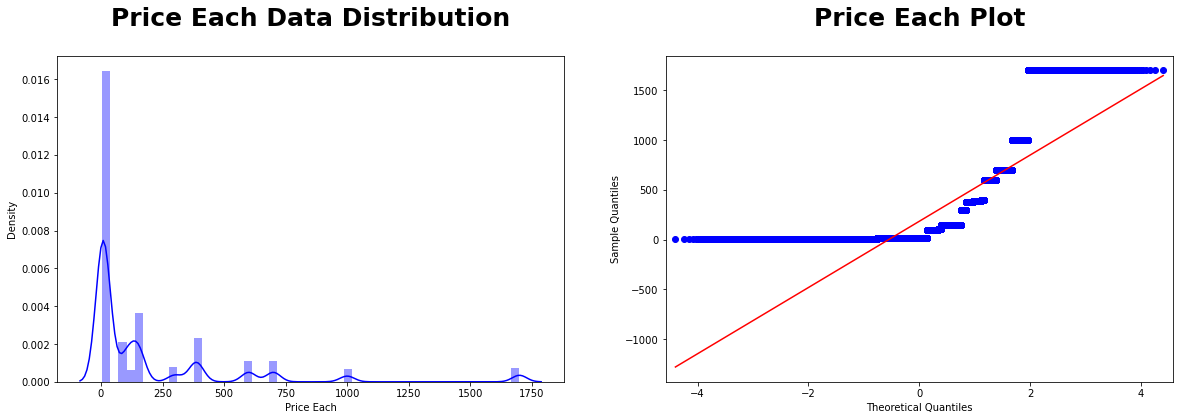

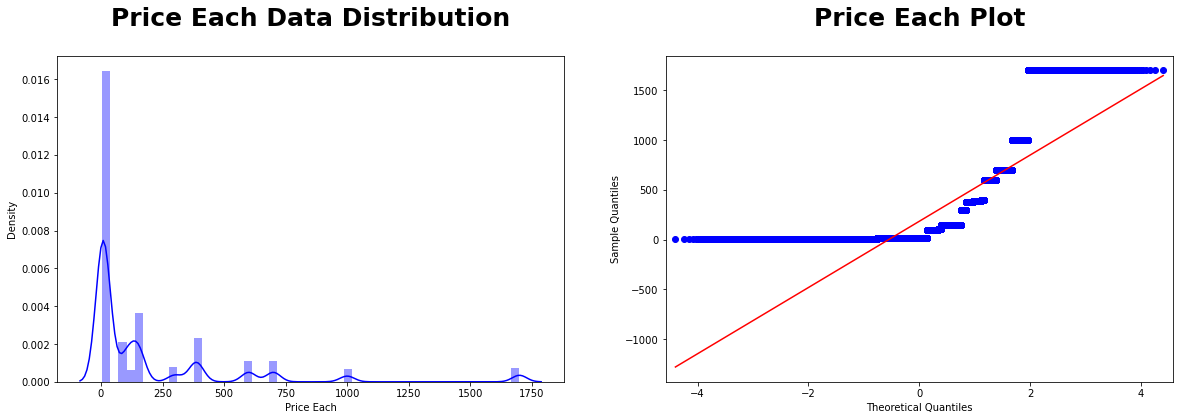

In [118]:
univariate_analysis(data=all_data['Price Each'],color='Blue',title1='Price Each Data Distribution',title2='Price Each Plot')

C:\Users\nguye\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


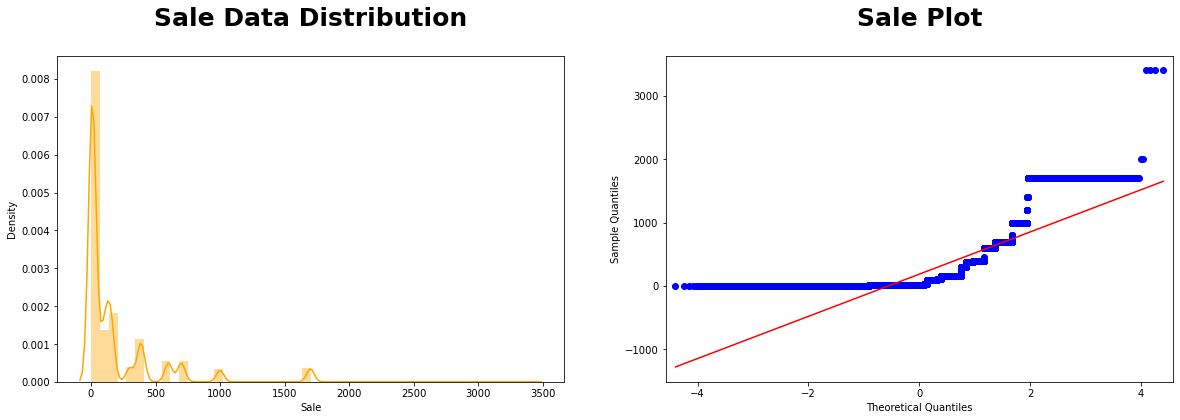

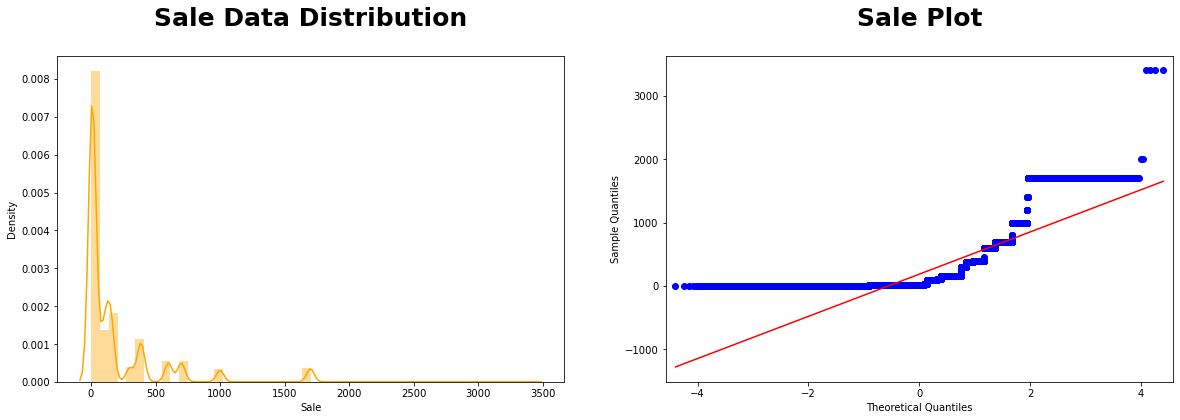

In [119]:
univariate_analysis(data=all_data['Sale'],color='Orange',title1='Sale Data Distribution',title2='Sale Plot')

(array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
        175000., 200000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

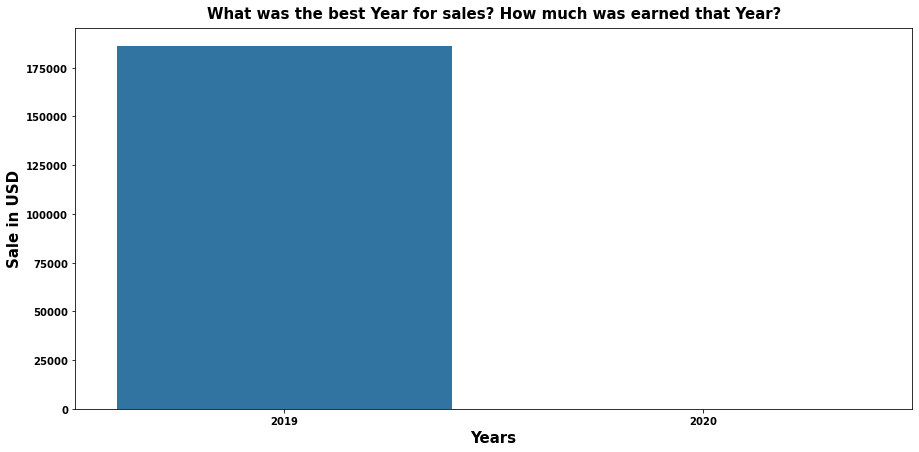

In [120]:
#Best year for sale
plt.figure(figsize = (15,7))
sns.countplot(x='Year',data=all_data)

plt.title("What was the best Year for sales? How much was earned that Year?", weight="bold", fontsize=15,pad=10)
plt.xlabel('Years', weight = 'bold', fontsize = 15)
plt.xticks(weight = 'bold', fontsize = 10)
plt.ylabel('Sale in USD', weight ='bold', fontsize=15)
plt.yticks(weight ='bold', fontsize=10)

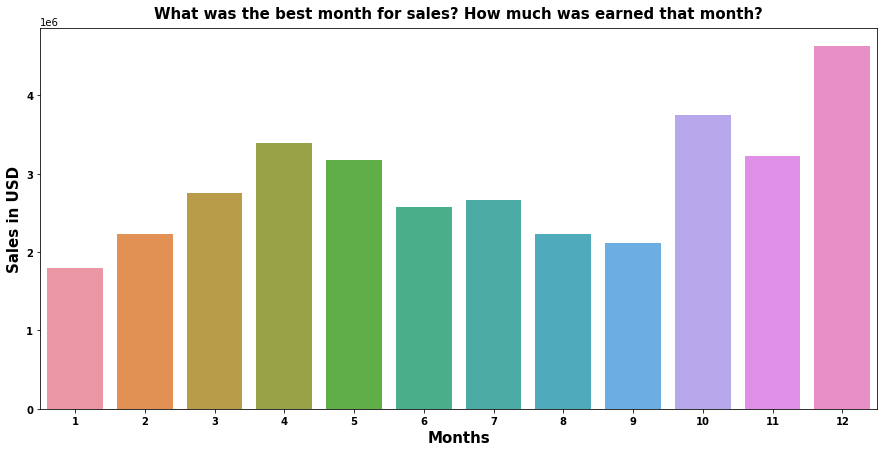

In [121]:
#Best month for sale
sale_by_month = all_data.groupby('Month').sum()
plt.figure(figsize = (15,7))
sns.barplot(x=sale_by_month.index, y=sale_by_month['Sale'], data = sale_by_month)
plt.title("What was the best month for sales? How much was earned that month?", weight="bold",fontsize=15, pad=10)
plt.xlabel("Months", weight="bold", fontsize=15)
plt.xticks(weight="bold", fontsize=10)
plt.ylabel("Sales in USD", weight="bold",fontsize=15)
plt.yticks(weight="bold", fontsize=10);

In [122]:
a = [hour for hour,df in all_data.groupby('Hour')]
a


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]